In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

Classification

Reading Data

In [56]:
with open("D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 1\Group11\Classification\LS_Group11\Class1.txt", 'r') as f:
    datasetClass1=f.read()
with open("D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 1\Group11\Classification\LS_Group11\Class2.txt", 'r') as f:
    datasetClass2=f.read()
with open("D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 1\Group11\Classification\LS_Group11\Class3.txt", 'r') as f:
    datasetClass3=f.read()

# Splitting Data

In [57]:
#class 1
datasetClass1=datasetClass1.splitlines()
class1=[]
for i in range(len(datasetClass1)):
    class1.append(np.float_(np.array(datasetClass1[i].split(" "))))
class1=c1#np.array(class1)
class1label=np.int_(np.zeros(np.shape(class1)[0]))
lastIndex=int(0.7*np.shape(class1)[0])
Train1=class1[:lastIndex,:]
Test1=class1[lastIndex:,:]
label1=class1label[lastIndex:]

#class 2
datasetClass2=datasetClass2.splitlines()
class2=[]
for i in range(len(datasetClass2)):
    class2.append(np.float_(np.array(datasetClass2[i].split(" "))))
class2=c2#np.array(class2)
class2label=np.int_(np.ones(np.shape(class2)[0]))
lastIndex=int(0.7*np.shape(class2)[0])
Train2=class2[:lastIndex,:]
Test2=class2[lastIndex:,:]
label2=class2label[lastIndex:]

#class 3
datasetClass3=datasetClass3.splitlines()
class3=[]
for i in range(len(datasetClass3)):
    class3.append(np.float_(np.array(datasetClass3[i].split(" "))))
class3=c3#np.array(class3)
class3label=2*np.int_(np.ones(np.shape(class3)[0]))
lastIndex=int(0.7*np.shape(class3)[0])
Train3=class3[:lastIndex,:]
Test3=class3[lastIndex:,:]
label3=class3label[lastIndex:]

Training Data

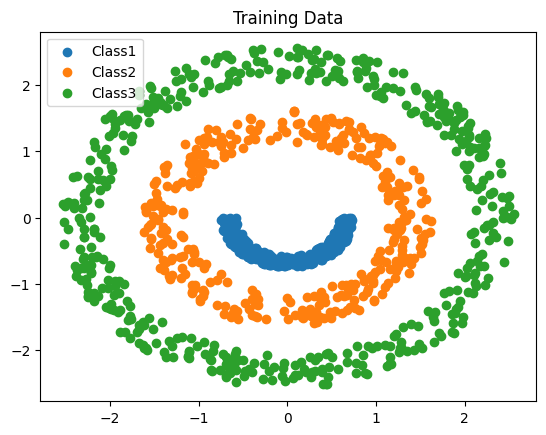

In [58]:
plt.scatter(Train1[:,0],Train1[:,1],label="Class1")
plt.scatter(Train2[:,0],Train2[:,1],label="Class2")
plt.scatter(Train3[:,0],Train3[:,1],label="Class3")
plt.legend()
plt.title("Training Data")
plt.show()

Test Data

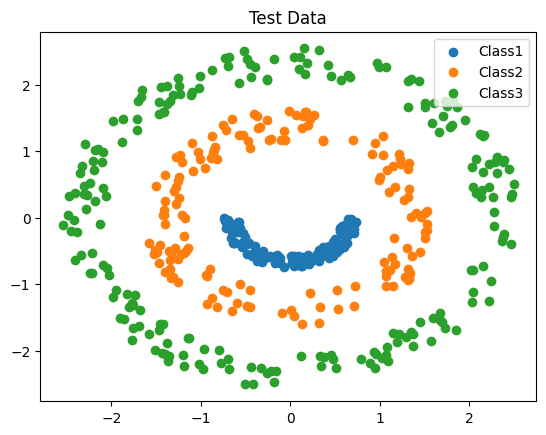

In [59]:
plt.scatter(Test1[:,0],Test1[:,1],label="Class1")
plt.scatter(Test2[:,0],Test2[:,1],label="Class2")
plt.scatter(Test3[:,0],Test3[:,1],label="Class3")
plt.legend()
plt.title("Test Data")
plt.show()

Perceptron

In [178]:
minx=min(min(Train1[:,0]),min(Train2[:,0]),min(Train3[:,0]))
maxx=max(max(Train1[:,0]),max(Train2[:,0]),max(Train3[:,0]))
miny=min(min(Train1[:,1]),min(Train2[:,1]),min(Train3[:,1]))
maxy=max(max(Train1[:,1]),max(Train2[:,1]),max(Train3[:,1]))
    
minx1=min(min(Train1[:,0]),min(Train2[:,0]))
maxx1=max(max(Train1[:,0]),max(Train2[:,0]))
miny1=min(min(Train1[:,1]),min(Train2[:,1]))
maxy1=max(max(Train1[:,1]),max(Train2[:,1]))

minx2=min(min(Train3[:,0]),min(Train2[:,0]))
maxx2=max(max(Train3[:,0]),max(Train2[:,0]))
miny2=min(min(Train3[:,1]),min(Train2[:,1]))
maxy2=max(max(Train3[:,1]),max(Train2[:,1]))

minx3=min(min(Train1[:,0]),min(Train3[:,0]))
maxx3=max(max(Train1[:,0]),max(Train3[:,0]))
miny3=min(min(Train1[:,1]),min(Train3[:,1]))
maxy3=max(max(Train1[:,1]),max(Train3[:,1]))

w11=random.uniform(minx1,maxx1)
w12=random.uniform(miny1,maxy1)
b10=random.uniform(minx1,maxx1)
w1=np.array([b10,w11,w12])

w21=random.uniform(minx2,maxx2)
w22=random.uniform(miny2,maxy2)
b20=random.uniform(minx2,maxx2)
w2=np.array([b20,w21,w22])

w31=random.uniform(minx3,maxx3)
w32=random.uniform(miny3,maxy3)
b30=random.uniform(minx3,maxx3)
w3=np.array([b30,w31,w32])

In [65]:
def sigmoidal(a):
    op=1/(1+np.exp(-a))
    return op

In [66]:
def sigdel(a,X):
    d=(np.exp(-a)/((1+np.exp(-a))**2))*(np.ones(np.shape(X)))
    return np.multiply(d,X)

In [67]:
def weight(clas,OP,w,a,X):
    eta=0.001
    err=(OP-clas)
    delta=err*sigdel(a,X)
    return w+eta*delta

In [175]:
def perceptron(Train,OP,w):
    X=[]
    error=0
    for i in range(np.shape(Train)[0]):
        X.append(np.array([1,Train[i][0],Train[i][1]]))
    X=np.array(X)
    for i in range(np.shape(Train)[0]):
        PercepOp=np.matmul(w,np.transpose(X[i]))
        op=sigmoidal(PercepOp)
        if op<0.5:
            clas=0
        else:
            clas=1
        error+=((OP[i]-clas)**2)/2
        w=weight(clas,OP[i],w,PercepOp,X[i])
    return w,error

Training Phase

In [179]:
Eperr1=[]
Eperr2=[]
Eperr3=[]
Ep1=[]
Ep2=[]
Ep3=[]
e11=1
e22=1
e33=1
num1=0
num2=0
num3=0
while e11>(0.0001):
    num1+=1
    OP1=np.zeros(np.shape(Train1)[0])
    OP2=np.ones(np.shape(Train2)[0])
    Train=np.concatenate((Train1,Train2))
    OP=np.concatenate((OP1,OP2))
    w1,e1=perceptron(Train,OP,w1)
    Eperr1.append(e1/np.shape(Train)[0])
    Ep1.append(num1)
    if num1==1:
        continue
    e11=Eperr1[num1-2]-Eperr1[num1-1]

while e22>(0.0001):
    num2+=1
    OP1=np.zeros(np.shape(Train3)[0])
    OP2=np.ones(np.shape(Train2)[0])
    Train=np.concatenate((Train3,Train2))
    OP=np.concatenate((OP1,OP2))
    w2,e2=perceptron(Train,OP,w2)
    Eperr2.append(e2/np.shape(Train)[0])
    Ep2.append(num2)
    if num2==1:
        continue
    e22=Eperr2[num2-2]-Eperr2[num2-1]

while e33>(0.0001):
    num3+=1
    OP1=np.zeros(np.shape(Train3)[0])
    OP2=np.ones(np.shape(Train1)[0])
    Train=np.concatenate((Train3,Train1))
    OP=np.concatenate((OP1,OP2))
    w3,e3=perceptron(Train,OP,w3)
    Eperr3.append(e3/np.shape(Train)[0])
    Ep3.append(num3)
    if num3==1:
        continue
    e33=Eperr3[num3-2]-Eperr3[num3-1]
    

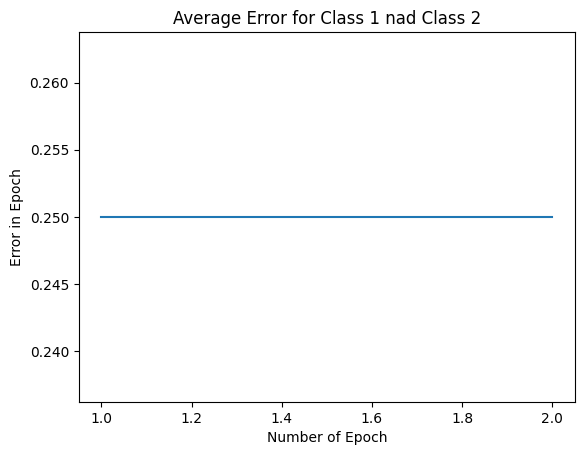

In [180]:
plt.plot(Ep1,Eperr1)
plt.xlabel("Number of Epoch")
plt.ylabel("Error in Epoch")
plt.title("Average Error for Class 1 nad Class 2")
plt.show()

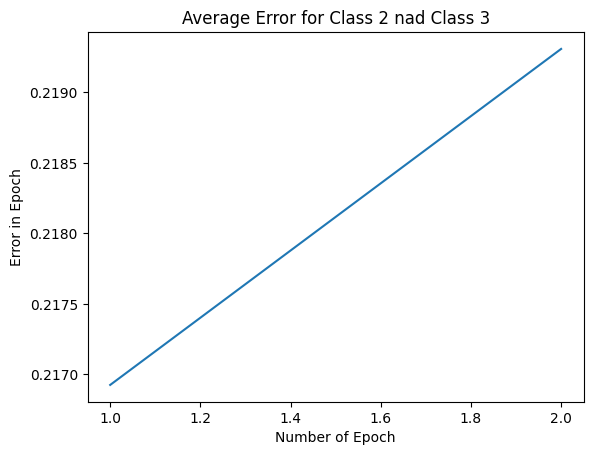

In [181]:
plt.plot(Ep2,Eperr2)
plt.xlabel("Number of Epoch")
plt.ylabel("Error in Epoch")
plt.title("Average Error for Class 2 nad Class 3")
plt.show()

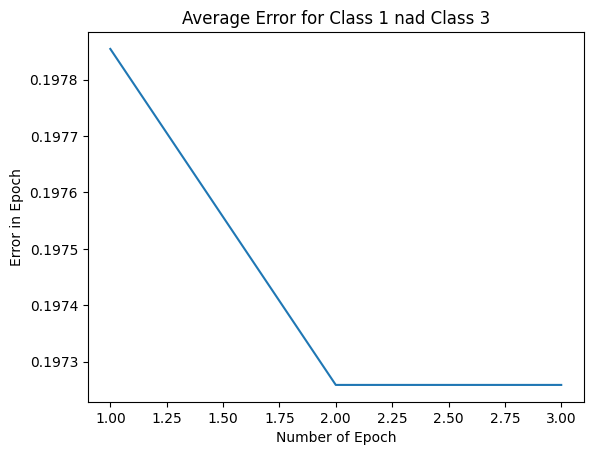

In [182]:
plt.plot(Ep3,Eperr3)
plt.xlabel("Number of Epoch")
plt.ylabel("Error in Epoch")
plt.title("Average Error for Class 1 nad Class 3")
plt.show()

Testing

In [89]:
Tes=np.concatenate((Test1,Test2,Test3))
Test=[]
for i in range(np.shape(Tes)[0]):
    Test.append(np.array([1,Tes[i][0],Tes[i][1]]))
Test=np.array(Test)
Label=np.concatenate((label1,label2,label3))

In [74]:
def classify(Test):
    P1=np.matmul(w1,np.transpose(Test))
    P2=np.matmul(w2,np.transpose(Test))
    P3=np.matmul(w3,np.transpose(Test))
    clss=[]
    clss1=[]
    clss2=[]
    clss3=[]
    for i in range(np.shape(Test)[0]):
        if P1[i]<0.5:
           clss1.append(0)
        elif P1[i]>=0.5:
            clss1.append(1)
        if P2[i]<0.5:
            clss2.append(2)
        elif P2[i]>=0.5:
            clss2.append(1)
        if P3[i]<0.5:
            clss3.append(2)
        elif P3[i]>=0.5:
            clss3.append(0)
    clss1=np.array(clss1)
    clss2=np.array(clss2)
    clss3=np.array(clss3)
    for i in range(np.shape(Test)[0]):
        c=np.array([clss1[i],clss2[i],clss3[i]])
        count=[0,0,0]
        for j in range(len(c)):
            if c[j]==0:
                count[0]+=1
            elif c[j]==1:
                count[1]+=1
            elif c[j]==2:
                count[2]+=1
        clss.append(np.argmax(count))
    clss=np.array(clss)
    return clss


In [183]:
Clss=classify(Test)

Confusion Matrix

In [184]:
c11=0
c12=0
c13=0
c21=0
c22=0
c23=0
c31=0
c32=0
c33=0

In [185]:
for i in range(np.shape(Test)[0]):
    if Clss[i]==0 and Label[i]==0:
        c11+=1
    elif Clss[i]==1 and Label[i]==0:
        c12+=1
    elif Clss[i]==2 and Label[i]==0:
        c13+=1
    elif Clss[i]==0 and Label[i]==1:
        c21+=1
    elif Clss[i]==1 and Label[i]==1:
        c22+=1
    elif Clss[i]==2 and Label[i]==1:
        c23+=1
    elif Clss[i]==0 and Label[i]==2:
        c31+=1
    elif Clss[i]==1 and Label[i]==2:
        c32+=1
    elif Clss[i]==2 and Label[i]==2:
        c33+=1

In [186]:
print("Confusion Matrix")
print("\t\t\tActual Class")
print('\t\t',"Class 1",'\t',"Class 2",'\t',"Class 3")
print("Class 1    ",'\t',c11,'\t\t',c21,'\t\t',c31)
print("Class 2    ",'\t',c12,'\t\t',c22,'\t\t',c32)
print("Class 3    ",'\t',c13,'\t\t',c23,'\t\t',c33)
print("Accuracy",(c11+c22+c33)/np.shape(Test)[0])

Confusion Matrix
			Actual Class
		 Class 1 	 Class 2 	 Class 3
Class 1     	 150 		 150 		 204
Class 2     	 0 		 0 		 0
Class 3     	 0 		 0 		 6
Accuracy 0.3058823529411765


Plots of Decesion Boundaries

In [44]:
def Mesh(minx,maxx,miny,maxy):
    xx,yy=np.meshgrid(np.linspace(minx,maxx,150),np.linspace(miny,maxy))
    mesh_feat_x=np.array([[x,0] for x in xx.ravel()])
    mesh_feat_y=np.array([[0,y] for y in yy.ravel()])
    mesh_feat=mesh_feat_x+mesh_feat_y
    return xx,yy,mesh_feat

In [45]:
def classify1(Test):
    P1=np.matmul(w1,np.transpose(Test))
    clss=[]
    for i in range(np.shape(Test)[0]):
        if P1[i]<0.5:
           clss.append(0)
        elif P1[i]>=0.5:
            clss.append(1)
    clss=np.array(clss)    
    return clss

In [46]:
def classify2(Test):
    P1=np.matmul(w2,np.transpose(Test))
    clss=[]
    for i in range(np.shape(Test)[0]):
        if P1[i]<0.5:
           clss.append(2)
        elif P1[i]>=0.5:
            clss.append(1)
    clss=np.array(clss)    
    return clss

In [47]:
def classify3(Test):
    P1=np.matmul(w3,np.transpose(Test))
    clss=[]
    for i in range(np.shape(Test)[0]):
        if P1[i]<0.5:
           clss.append(2)
        elif P1[i]>=0.5:
            clss.append(0)
    clss=np.array(clss)    
    return clss

Plot between class 1 and class 2

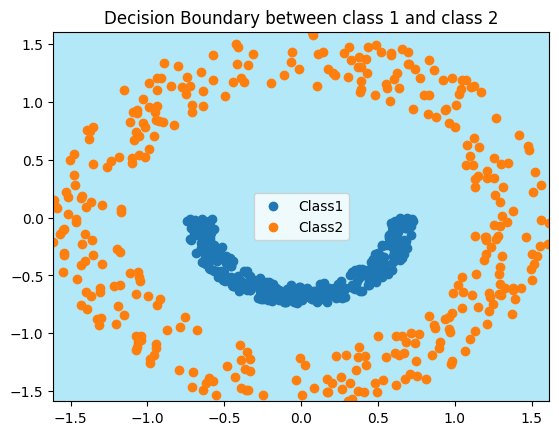

In [187]:
#ploting of decision boundary
xx,yy,mesh_feat=Mesh(minx1,maxx1,miny1,maxy1)
mesh=[]
for i in range(np.shape(mesh_feat)[0]):
    mesh.append(np.array([1,mesh_feat[i][0],mesh_feat[i][1]]))
mesh=np.array(mesh)

#predicting mesh feature class
pred=np.array(classify1(mesh))
pred=pred.reshape(xx.shape)

plt.contourf(xx,yy,pred, alpha=0.3, cmap="rainbow")
plt.scatter(Train1[:,0],Train1[:,1],label="Class1")
plt.scatter(Train2[:,0],Train2[:,1],label="Class2")
plt.legend()
plt.title('Decision Boundary between class 1 and class 2')
plt.show()

Plot between class 2 and class 3

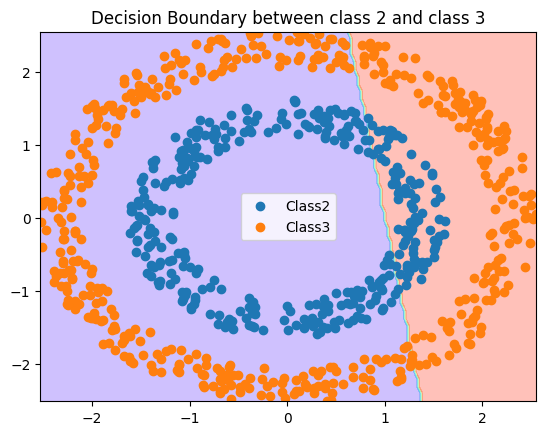

In [188]:
#ploting of decision boundary
xx,yy,mesh_feat=Mesh(minx2,maxx2,miny2,maxy2)
mesh=[]
for i in range(np.shape(mesh_feat)[0]):
    mesh.append(np.array([1,mesh_feat[i][0],mesh_feat[i][1]]))
mesh=np.array(mesh)

#predicting mesh feature class
pred=np.array(classify2(mesh))
pred=pred.reshape(xx.shape)

plt.contourf(xx,yy,pred, alpha=0.3, cmap="rainbow")
plt.scatter(Train2[:,0],Train2[:,1],label="Class2")
plt.scatter(Train3[:,0],Train3[:,1],label="Class3")
plt.legend()
plt.title('Decision Boundary between class 2 and class 3')
plt.show()

Plot between class 1 and class 3

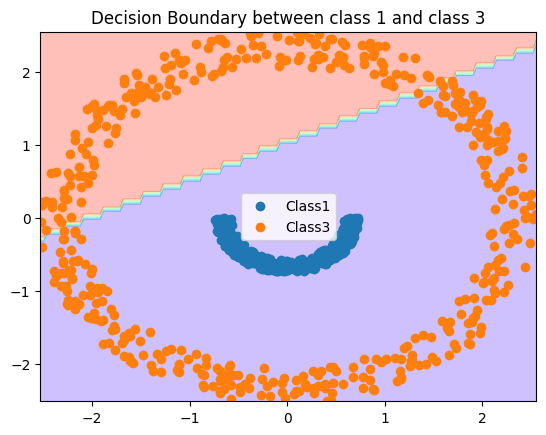

In [189]:
#ploting of decision boundary
xx,yy,mesh_feat=Mesh(minx3,maxx3,miny3,maxy3)
mesh=[]
for i in range(np.shape(mesh_feat)[0]):
    mesh.append(np.array([1,mesh_feat[i][0],mesh_feat[i][1]]))
mesh=np.array(mesh)

#predicting mesh feature class
pred=np.array(classify3(mesh))
pred=pred.reshape(xx.shape)

plt.contourf(xx,yy,pred, alpha=0.3, cmap="rainbow")
plt.scatter(Train1[:,0],Train1[:,1],label="Class1")
plt.scatter(Train3[:,0],Train3[:,1],label="Class3")
plt.legend()
plt.title('Decision Boundary between class 1 and class 3')
plt.show()

Boundary among classes

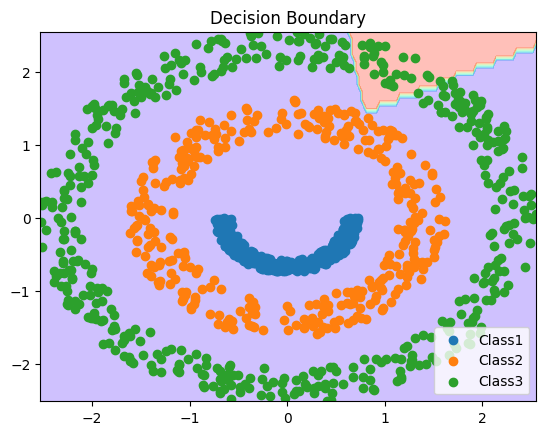

In [190]:
#ploting of decision boundary
xx,yy,mesh_feat=Mesh(minx,maxx,miny,maxy)
mesh=[]
for i in range(np.shape(mesh_feat)[0]):
    mesh.append(np.array([1,mesh_feat[i][0],mesh_feat[i][1]]))
mesh=np.array(mesh)

#predicting mesh feature class
pred=np.array(classify(mesh))
pred=pred.reshape(xx.shape)

plt.contourf(xx,yy,pred, alpha=0.3, cmap="rainbow")
plt.scatter(Train1[:,0],Train1[:,1],label="Class1")
plt.scatter(Train2[:,0],Train2[:,1],label="Class2")
plt.scatter(Train3[:,0],Train3[:,1],label="Class3")
plt.legend()
plt.title('Decision Boundary')
plt.show()

In [83]:
print(w1)
print(w2)
print(w3)

[-0.11526832  0.27254471  0.56028619]
[-1.40588431  1.95194519  0.44292402]
[-0.28934406  2.50147928 -1.89917326]


In [53]:
path="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 1\Group11\Classification\\NLS_Group11.txt"
with open(path,'r') as f:
    data=f.read()

In [54]:
data=data.splitlines()
data=data[1:]
data=data[:-1]
dat=[]
for i in range(len(data)):
    d=data[i].split(" ")
    dat.append(d[:-1])
dat=np.float_(np.array(dat))

In [55]:
c1=dat[:500]
c2=dat[500:1000]
c3=dat[1000:]